## *Lab One: Visualization and Data Processing*

## MSDS 7331 Machine Learning I

Joe Jiang, Stacey Smith, and Kenneth Richardson




## Business Understanding
The credit card default dataset was collected in Taiwan to predict credit card default using gathered credit card transactional information from customer's profiles.  The dataset contains 30,000 observations and measured by customers default status. The ability to accurately predict which customers who are going to default is critically important for the credit card issuers' financial bottomline. There's evidence that show once a customer's account become in default status, the result usually ends in a write-off charge.  Accurately predict customer's default status is high importance for proper assessment of risk and lowering the default rate. 

We will start with expoloratory and transforming of the data for visualization, including basic statistics.  Then, we will comprise the data to generate and compare several models to predict the default probability of credit card holders.  The models will be compared for their overall accuracy, precision and recall rate.  We will also compare the model's AUC scores to measure their robustness for predicting the customer's default status.  Finally, we will measure the variable importance scores of the models and provide credit card issuers with critical business intelligence to better assess credit card risk.

## Data Meaning Type
The customer's profile includes credit limit, (sex, age, and marriage status) and their credit card transaction information from past 6 months.  Also, customer's profile includes history of payments (past due status and monthly payments), and monthly bill statements.  The target is the default status of the customers.  The detail of attributes and target are list below (customer ID is omitted)



#####  1. 'LIMIT_BAL', credit card limit (numeric, int)
#####  2. 'SEX', customer gender, male = 1, female = 2 (categorical)
#####  3. 'EDUCATION', customers' education, graduate school = 1, college = 2, high school = 3, other = 4 (categorical)
#####  4. 'MARRIAGE', customer's marriage status, married =1, single =2, other =3 (categorical)
#####  5. 'AGE', customer's age (numeric, int)
#####  6. 'PAY_0', payment record (Sept, 2005, -1 to 9 indicate payment delayed by months) (nominal, int)
#####  7. 'PAY_2', payment record (Aug, 2005, -1 to 9 indicate payment delayed by months)(nominal, int)
#####  8. 'PAY_3', payment record (Jul, 2005, -1 to 9 indicate payment delayed by months)(nominal, int)
#####  9. 'PAY_4', payment record (Jun, 2005, -1 to 9 indicate payment delayed by months)(nominal, int)
#####  10. 'PAY_5', payment record (May, 2005, -1 to 9 indicate payment delayed by months)(nominal, int)
#####  11. 'PAY_6', payment record (Apr, 2005, -1 to 9 indicate payment delayed by months)(nominal, int)
#####  12. 'BILL_AMT1', monthly bill amount (Sept, 2005) (numeric, int)
#####  13. 'BILL_AMT2', monthly bill amount (Aug, 2005) (numeric, int)
#####  14. 'BILL_AMT3', monthly bill amount (Jul, 2005) (numeric, int)
#####  15. 'BILL_AMT4', monthly bill amount (Jun, 2005) (numeric, int)
#####  16. 'BILL_AMT5', monthly bill amount (May, 2005) (numeric, int) 
#####  17. 'BILL_AMT6', monthly bill amount (Apr, 2005) (numeric, int)
#####  18. 'PAY_AMT1', monthly payment (Sept, 2005) (numeric, int)
#####  19. 'PAY_AMT2', monthly payment (Aug, 2005) (numeric, int)
#####  20. 'PAY_AMT3', monthly payment (Jul, 2005) (numeric, int)
#####  21. 'PAY_AMT4', monthly payment (Jun, 2005) (numeric, int)
#####  22. 'PAY_AMT5', monthly payment (May, 2005) (numeric, int)
#####  23. 'PAY_AMT6', monthly payment (Apr, 2005) (numeric, int)
#####  24. 'default', default status of the card holder (yes =1, no = 0)*

In [138]:
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression

In [139]:
#view current directory
os.getcwd()

'/Users/rditlsts/SMU/DS_7331_Machine_Learning_I/DS_7331_Machine_Learning_Projects/Lab2'

In [140]:
data_df = pd.read_csv("Default_Credit_File.csv") #import csv


In [141]:
data_df.shape  #30k rows of customers and 25 attributes (24 minue 'ID')

(30000, 25)

In [142]:
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


---

## Data Quality
An initial quick check of the dataset indicating there were no missing values.  we noticed that for some subcategories of categorical features there was no description provided. To remedy this issue, we decided to combine those with other subcategories.  Also, we found similar nominal values where there was not a description for some numerical features, and proceeded to apply the same methodology shown below.

##### Categorical Features:  
'EDUCATION', there was two subcategories (0, 5, & 6) that we didn't have a description for, therefore, we replaced with a 4 = 'other'

'MARRIAGE', there was one subscategory (0) that we didn't have a description for.  We replaced with a 3 = 'other'

##### Numerical Feautures:
'PAY_0', there was no description for (0,-1, and -2). We replaced (-1 and -2) with = 0; with assumption 0 means paid on time

'PAY_2', there was no description for (0,-1, and -2). We replaced (-1 and -2) with = 0; with assumption 0 means paid on time

'PAY_3', there was no description for (0,-1, and -2). We replaced (-1 and -2) with = 0; with assumption 0 means paid on time

'PAY_4', there was no description for (0,-1, and -2). We replaced (-1 and -2) with = 0; with assumption 0 means paid on time

'PAY_5', there was no description for (0,-1, and -2). We replaced (-1 and -2) with = 0; with assumption 0 means paid on time

'PAY_6', there was no description for (0,-1, and -2). We replaced (-1 and -2) with = 0; with assumption 0 means paid on time

In [143]:
null_counts = data_df.isnull().sum() # Count of null values if any
null_counts[null_counts > 0].sort_values(ascending=False) # sorting null values if any, descending

Series([], dtype: int64)

In [144]:
null_counts 

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There were no missing values

In [145]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [146]:
#Renaming Columns
data_df.columns = ['ID','LIMIT_BAL','SEX','EDUCATION', 'MARRIAGE', 'AGE','Sept2005_Pmt','Aug2005_Pmt','July2005_Pmt',\
                  'June2005_Pmt','May2005_Pmt','April2005_Pmt', 'Sept2005_BillAmt','Aug2005_BillAmt','July2005_BillAmt',\
                    'June2005_BillAmt','May2005_BillAmt','April2005_BillAmt','Sept2005_AmtPaid','Aug2005_AmtPaid',\
                      'July2005_AmtPaid','June2005_AmtPaid','May2005_AmtPaid','April2005_AmtPaid','Default_Pmt' ]


In [147]:
data_df.info() # confirming renamed columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                   30000 non-null int64
LIMIT_BAL            30000 non-null int64
SEX                  30000 non-null int64
EDUCATION            30000 non-null int64
MARRIAGE             30000 non-null int64
AGE                  30000 non-null int64
Sept2005_Pmt         30000 non-null int64
Aug2005_Pmt          30000 non-null int64
July2005_Pmt         30000 non-null int64
June2005_Pmt         30000 non-null int64
May2005_Pmt          30000 non-null int64
April2005_Pmt        30000 non-null int64
Sept2005_BillAmt     30000 non-null int64
Aug2005_BillAmt      30000 non-null int64
July2005_BillAmt     30000 non-null int64
June2005_BillAmt     30000 non-null int64
May2005_BillAmt      30000 non-null int64
April2005_BillAmt    30000 non-null int64
Sept2005_AmtPaid     30000 non-null int64
Aug2005_AmtPaid      30000 non-null int64
July2005_AmtPaid     30000 non-null int64
June2005_

---

## Simple Statistics

In [148]:
import numpy as np
import pandas as pd
import pandas_profiling

In [149]:
#Generating profile using pandas_profiling

#pandas_profiling.ProfileReport(data_df)

pandas_profiling is an extremely powerful tool for examining the distribution and summary statistics of all attrributes and target. It also includes the correlation heatmap of all attributes and target, even warnings about highly correlated attributes. We based most of our subsequent data cleanup on the profile.

---

## Visualize Attributes and Data Cleanup

In [150]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [151]:
# Overall default rate
data_df.Default_Pmt.sum()/data_df.Default_Pmt.count()

0.2212

In [152]:
#Replace -1 and -2 with 0 for late payment status, 0 represents customers with no late payments 
data_df.Sept2005_Pmt = data_df.Sept2005_Pmt.replace(to_replace = (-1, -2), value = 0)
data_df.Aug2005_Pmt = data_df.Aug2005_Pmt.replace(to_replace = (-1, -2), value = 0)
data_df.July2005_Pmt = data_df.July2005_Pmt.replace(to_replace = (-1, -2), value = 0)
data_df.June2005_Pmt = data_df.June2005_Pmt.replace(to_replace = (-1, -2), value = 0)
data_df.May2005_Pmt = data_df.May2005_Pmt.replace(to_replace = (-1, -2), value = 0)
data_df.April2005_Pmt = data_df.April2005_Pmt.replace(to_replace = (-1, -2), value = 0)

In [153]:
# Replace value 0 with 3 for marriage variable. 0 is not described, we combine it with 3 (other)
data_df.MARRIAGE = data_df.MARRIAGE.replace(to_replace = 0, value = 3)

#Replacing value (0,5, & 6) with 4 for education variable, 0, 5, 6 are not described, we combine them with 4 (other)
data_df.EDUCATION = data_df.EDUCATION.replace(to_replace = (0, 5, 6), value = 4)

In [154]:
# Double check the number of MARRIAGE categories 
data_df.MARRIAGE.unique()

array([1, 2, 3])

In [155]:
# Double check the number of EDUCATION categories
data_df.EDUCATION.unique()

array([2, 1, 3, 4])

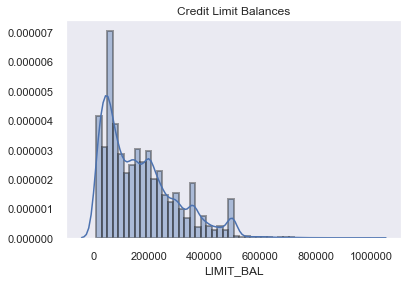

In [156]:
# Histogram showing the distribution of credit limit 
sns.distplot(data_df.LIMIT_BAL, hist_kws=dict(edgecolor="k", linewidth =2))
plt.title('Credit Limit Balances')
plt.show()

Credit limit is right skewed, it appears to be heavily concentrated in the range of 0 to 250K Taiwanese dollars. 

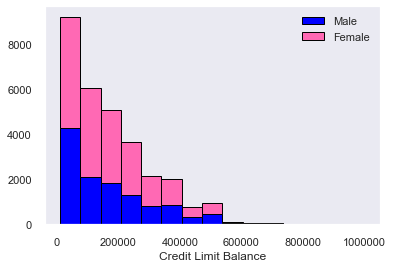

In [157]:
# Credit limit distribution of male and female customers (stacked graph)
colors = ['blue', 'hotpink']
plt.hist([data_df[data_df.SEX == 1].LIMIT_BAL, \
          data_df[data_df.SEX == 2].LIMIT_BAL], \
         bins=15, ec='black', stacked ='True',color=colors)
plt.xlabel("Credit Limit Balance")
#create legend
labels = ["Male","Female"]
plt.legend(labels)
plt.show()

Above graph shows a stacked bar graph of male and female customers' credit limit balances. They appear to have similar credit limits.

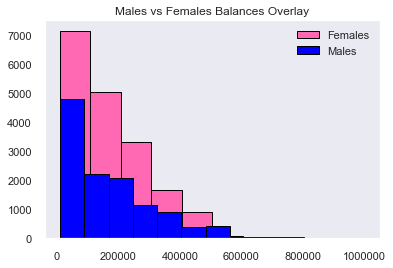

In [158]:
#Comparing Male vs Females limit balances (overlaid graph)

plt.hist(data_df[data_df.SEX == 2].LIMIT_BAL, ec='black', label='Females',color = 'hotpink')
plt.hist(data_df[data_df.SEX == 1].LIMIT_BAL, ec='black',label='Males',color = 'blue')
plt.title( 'Males vs Females Balances Overlay')
plt.legend()
plt.show()

Above graph shows a overlaid bar chart of males vs females credit limit balances. 

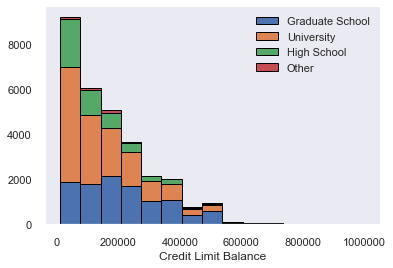

In [159]:
# credit limit by customers' EDUCATION level

plt.hist([data_df[data_df.EDUCATION == 1].LIMIT_BAL,\
          data_df[data_df.EDUCATION == 2].LIMIT_BAL,\
          data_df[data_df.EDUCATION == 3].LIMIT_BAL,\
          data_df[data_df.EDUCATION == 4].LIMIT_BAL],
         bins=15, ec='black', stacked ='True')
plt.xlabel("Credit Limit Balance")
#create legend
labels = ["Graduate School","University","High School","Other"]
plt.legend(labels)
plt.show()
          
      
          
          
          

Above graph shows a stacked bar chart of credit limit balances of education levels.  It appears that persons holding a college degree or both appears to have higher credit limit balance compared to others.

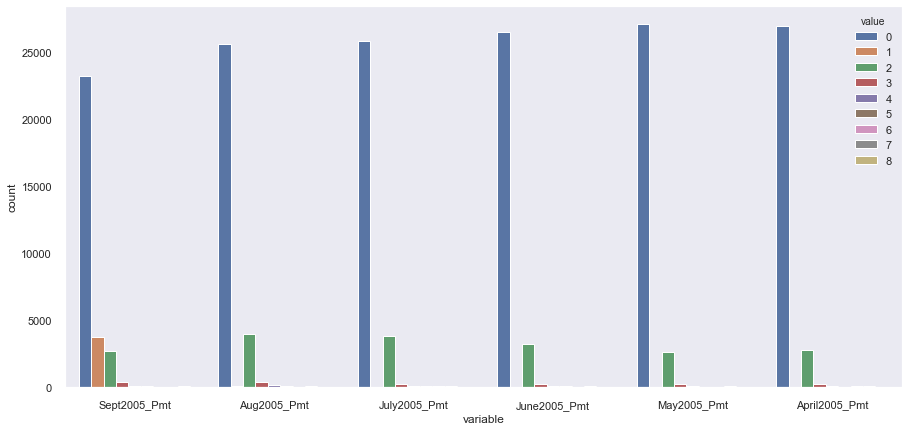

In [160]:
# We exmained all payment status of customers in the last 6 months 
plt.figure(figsize = (15,7))
sns.countplot(x= 'variable', hue = 'value', data = pd.melt(data_df[['Sept2005_Pmt', 'Aug2005_Pmt', 'July2005_Pmt', 'June2005_Pmt', 'May2005_Pmt', 'April2005_Pmt']]))
plt.show()

For payment status in the last six months, 'April_20005_Pmt' to 'Sept2005_Pmt', '-2' and '0' are not in the original data description, they likely represent two additional subcategories of 'no comsuption' and 'revolving credit'. We combined them with -1 ('pay duly') and assigned them all to '0' catagory. This largest group represent ''no late payment'.

## Explore Joint Attributes

In [161]:
## Cross-tabulation with MARRIAGE AND EDUCATION
pd.crosstab(data_df.MARRIAGE, data_df.EDUCATION, margins=True)

EDUCATION,1,2,3,4,All
MARRIAGE,,,,,
1,3722,6842,2861,234,13659
2,6809,7020,1909,226,15964
3,54,168,147,8,377
All,10585,14030,4917,468,30000


In [162]:
# Remove the ID column, it has no value in predicting customers' default rate
df = data_df.drop('ID', axis=1, inplace=True)

In [163]:
#Matrix/ heatmaps of numeric attributes and target
htmap = df.corr()

AttributeError: 'NoneType' object has no attribute 'corr'

In [164]:
htmap

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept2005_Pmt,Aug2005_Pmt,July2005_Pmt,June2005_Pmt,May2005_Pmt,...,June2005_BillAmt,May2005_BillAmt,April2005_BillAmt,Sept2005_AmtPaid,Aug2005_AmtPaid,July2005_AmtPaid,June2005_AmtPaid,May2005_AmtPaid,April2005_AmtPaid,Default_Pmt
LIMIT_BAL,1.000000,0.024755,-0.231088,-0.111012,0.144713,-0.170745,-0.197136,-0.191323,-0.180629,-0.170045,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.034475,-0.044750,-0.041227,-0.039737,-0.038533,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.055937,0.062739,0.053058,0.051209,0.039623,...,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
MARRIAGE,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,-0.011551,-0.009275,0.002556,-0.003029,-0.002497,...,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.144713,-0.090874,0.182434,-0.412001,1.000000,-0.001447,-0.008774,-0.014266,-0.007288,-0.013277,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
Sept2005_Pmt,-0.170745,-0.034475,0.055937,-0.011551,-0.001447,1.000000,0.698389,0.516970,0.460224,0.424473,...,0.022100,0.030731,0.030201,-0.079177,-0.057189,-0.062620,-0.061886,-0.053784,-0.048733,0.396019
Aug2005_Pmt,-0.197136,-0.044750,0.062739,-0.009275,-0.008774,0.698389,1.000000,0.663529,0.512773,0.462717,...,0.032467,0.040422,0.042222,-0.097475,-0.054838,-0.059865,-0.053981,-0.048714,-0.043099,0.327093
July2005_Pmt,-0.191323,-0.041227,0.053058,0.002556,-0.014266,0.516970,0.663529,1.000000,0.678931,0.551430,...,0.016579,0.026196,0.028979,-0.039356,-0.073670,-0.057702,-0.053849,-0.050805,-0.048443,0.286999
June2005_Pmt,-0.180629,-0.039737,0.051209,-0.003029,-0.007288,0.460224,0.512773,0.678931,1.000000,0.745419,...,0.014654,0.027239,0.033138,-0.054484,-0.036877,-0.074064,-0.055305,-0.052732,-0.048828,0.269055
May2005_Pmt,-0.170045,-0.038533,0.039623,-0.002497,-0.013277,0.424473,0.462717,0.551430,0.745419,1.000000,...,0.024139,0.036216,0.042616,-0.053692,-0.039586,-0.037270,-0.065943,-0.051815,-0.046110,0.260850


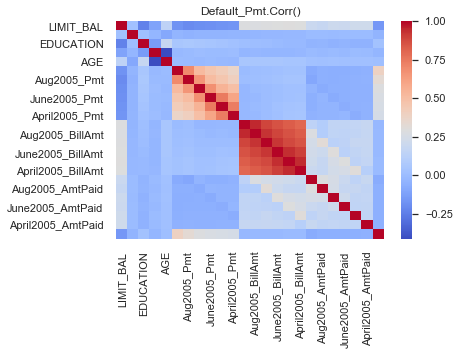

In [165]:
sns.heatmap(htmap, cmap='coolwarm')
sns.set(rc={'figure.figsize':(6,6)})
plt.title('Default_Pmt.Corr()')
plt.show()

From the heatmap, we can distinctively see two highly correlated groups of attributes, customers' late payment status and monthly bill. We see the same result from pandas_profiling of the dataset.

#Must run cell as Markdown
![title](images/over_view.png)

From the Pandas Profiling output report, we noticed there's a high correlation of bill amounts from month to month.

![title](images/pearson_correlation.png)

From the Pearson correlation plot,  we also noticed there's a negative correlation between Marriage and Age.  There is a slight correlation between the Pay and Bill amount features.

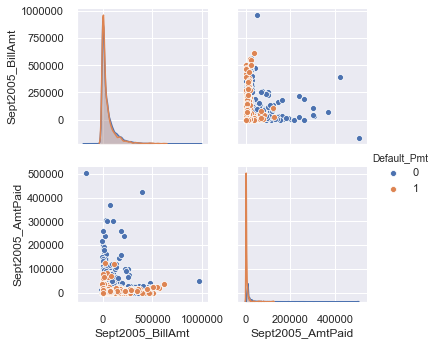

In [166]:
# Pairwise scatter plot bill_amt1 vs pay_amt1 with 20% of customers
data_df_frac = data_df.sample(frac=0.2, replace = False)
g = sns.pairplot(data_df_frac, vars = ['Sept2005_BillAmt', 'Sept2005_AmtPaid'], hue = 'Default_Pmt')

From this graph we see that customers with extremely large monthly payment tend to have very low default rate. However, the plot shows no clear separation of default status for the majority of customers (other bill and payment pairwise scatter plots show similar pattern).

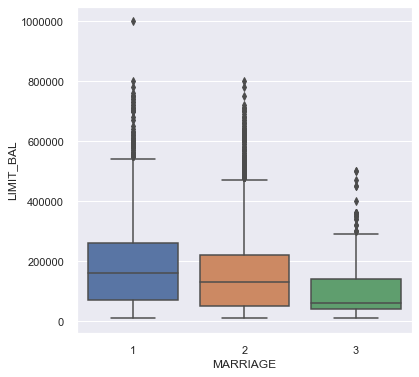

In [167]:
# Boxplot shows the quartiles of the dataset 
w = sns.boxplot(data=data_df, x='MARRIAGE', y='LIMIT_BAL')

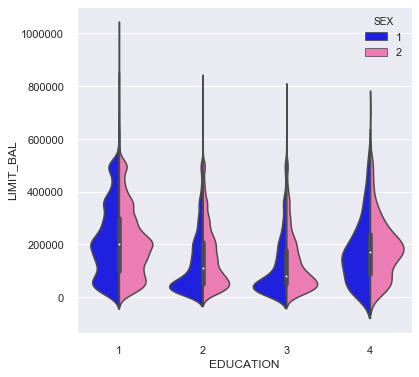

In [168]:
#Violinplots with added hue and split, you can compare the distributions of Male VS Female credit limit based on Education
colors = ['blue', 'hotpink']
sns.violinplot(data=data_df, x='EDUCATION', y='LIMIT_BAL', hue='SEX', palette=colors, split=True)
plt.show()

From the violin plot above, it appears there's no credit limit difference between genders.  

## Explore Attributes and Class

In [169]:
from sklearn.linear_model import LogisticRegression

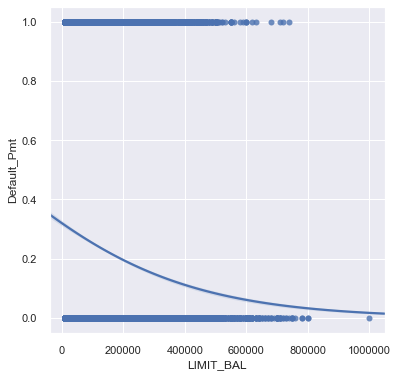

In [170]:
sns.regplot(x='LIMIT_BAL', y='Default_Pmt', data=data_df, logistic=True)

What's interesting to note here (above graph) is that as credit limit balances increases, the probability of "Default"  (Default_Pmt =1) decreases

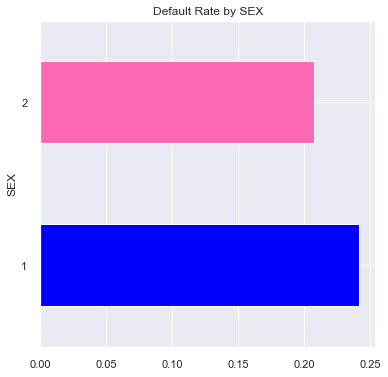

In [171]:
# Default rate by gender
colors = ['blue', 'hotpink']
data_grouped = data_df.groupby(by=data_df.SEX)
default_rate = data_grouped.Default_Pmt.sum()/data_grouped.Default_Pmt.count()
default_rate.plot(kind='barh',color=colors)
plt.title('Default Rate by SEX')
sns.set_style("dark") 

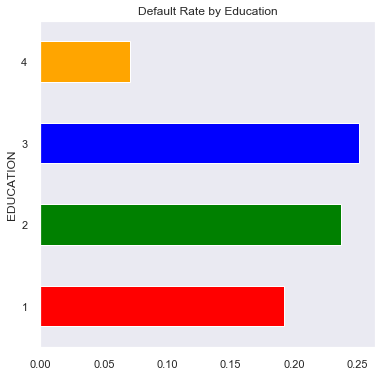

In [172]:
# Default rate by education
colors = ['red', 'green', 'blue', 'orange']
data_grouped = data_df.groupby(by=data_df.EDUCATION)
default_rate = data_grouped.Default_Pmt.sum()/data_grouped.Default_Pmt.count()
default_rate.plot(kind='barh', color=colors)
plt.title('Default Rate by Education')
sns.set_style("dark")  
plt.show()

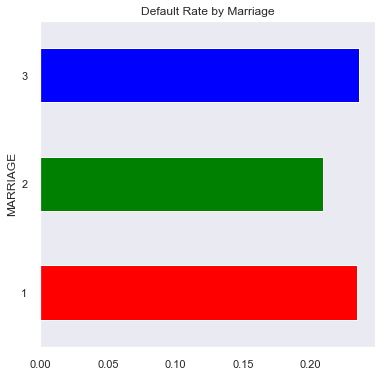

In [173]:
# Default rate by marriage
colors = ['red', 'green', 'blue', 'orange']
data_grouped = data_df.groupby(by=data_df.MARRIAGE)
default_rate = data_grouped.Default_Pmt.sum()/data_grouped.Default_Pmt.count()
default_rate.plot(kind='barh', color=colors)
plt.title('Default Rate by Marriage')
sns.set_style("dark")  #To get rid of grid
plt.show()

In [174]:
import numpy as np

## New Features
In terms of new and additional features, we think that a FICO-like score could be a very important predictior of default. However, we are not familiar with Tainwanese financial system and uncertain about the existence of this kind of credit history score. From existing features, we generated two new features, "Age Groups" and "Risk Categories". We explored their relationships with default status.

In [175]:
#Creating new AGE_GROUP column with where function
data_df['AGE_GROUP'] = np.where(data_df['AGE'] <= 30, 'Young', 'Middle')
data_df['AGE_GROUP'] = np.where(data_df['AGE'] > 60, 'Senior', data_df['AGE_GROUP'] )

In [176]:
#Confirming new variable was added with new values
data_df.AGE_GROUP.unique()

array(['Young', 'Middle', 'Senior'], dtype=object)

In [177]:
#adding group by to view count of AGE_GROUP subcategories
data_df.groupby(['AGE_GROUP']).size()

AGE_GROUP
Middle    18715
Senior      272
Young     11013
dtype: int64

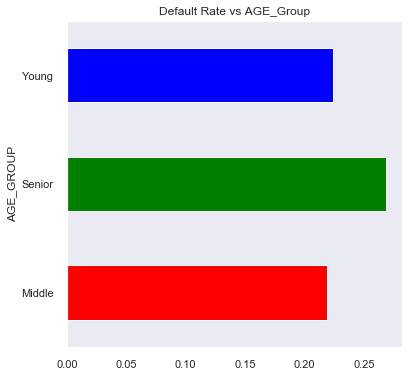

In [178]:
# Default rate by AGE_Group
colors = ['red', 'green', 'blue', 'orange']
data_grouped = data_df.groupby(by=data_df.AGE_GROUP)
default_rate = data_grouped.Default_Pmt.sum()/data_grouped.Default_Pmt.count()
default_rate.plot(kind='barh',color=colors)
plt.title('Default Rate vs AGE_Group')
plt.show()

Interestingly, seniors have higher default rate. However, the number of seniors in the dataset is low (only 272). 

In [179]:
data_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept2005_Pmt,Aug2005_Pmt,July2005_Pmt,June2005_Pmt,May2005_Pmt,...,May2005_BillAmt,April2005_BillAmt,Sept2005_AmtPaid,Aug2005_AmtPaid,July2005_AmtPaid,June2005_AmtPaid,May2005_AmtPaid,April2005_AmtPaid,Default_Pmt,AGE_GROUP
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,689,0,0,0,0,1,Young
1,120000,2,2,2,26,0,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,Young
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,Middle
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,Middle
4,50000,1,2,1,57,0,0,0,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,Middle


In [180]:
#Creating new column to obtain maximum values for multiple columns

data_df['Num_Missed_Pmts'] = data_df[['Sept2005_Pmt','Aug2005_Pmt', 'July2005_Pmt', 'June2005_Pmt','May2005_Pmt','April2005_Pmt']].max(1)

In [181]:
## Creating categorical variable based on the maximun number of late Payments 
data_df['Risk_Category'] = np.where(data_df['Num_Missed_Pmts'] < 1, 'LowRisk', 'ModerateRisk')
data_df['Risk_Category'] = np.where(data_df['Num_Missed_Pmts'] >= 2, 'HighRisk', data_df['Risk_Category'] )

data_df.Risk_Category.unique()

array(['HighRisk', 'LowRisk', 'ModerateRisk'], dtype=object)

In [182]:
#adding group by to view count of Risk_Category subcategories
data_df.groupby(['Risk_Category']).size()

Risk_Category
HighRisk         8380
LowRisk         19931
ModerateRisk     1689
dtype: int64

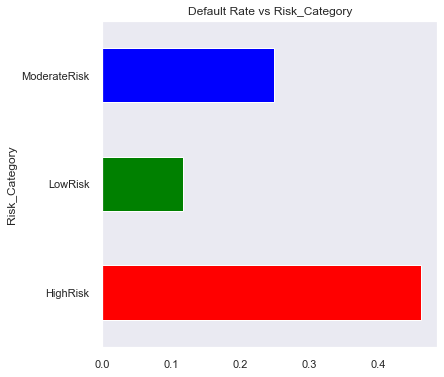

In [183]:
# Default rate by Risk_Category
colors = ['red', 'green', 'blue', 'orange']
data_grouped = data_df.groupby(by=data_df.Risk_Category)
default_rate = data_grouped.Default_Pmt.sum()/data_grouped.Default_Pmt.count()
default_rate.plot(kind='barh',color=colors)
plt.title('Default Rate vs Risk_Category')
plt.show()

From the graph, we can clearly see that moderate and high risk customers have much higher default rate.

---

## Encode categorical variables

In [185]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
categorial_cols = ['AGE_GROUP','Num_Missed_Pmts','Risk_Category', 'Default_Pmt','SEX','EDUCATION','MARRIAGE']
    
for cc in categorial_cols:
    data_df[cc+"_code"] = lb_make.fit_transform(data_df[cc])
    data_df.drop(cc, axis=1, inplace=True)
    
data_df.head()  

,LIMIT_BAL,AGE,Sept2005_Pmt,Aug2005_Pmt,July2005_Pmt,June2005_Pmt,May2005_Pmt,April2005_Pmt,Sept2005_BillAmt,Aug2005_BillAmt,...,June2005_AmtPaid,May2005_AmtPaid,April2005_AmtPaid,AGE_GROUP_code,Num_Missed_Pmts_code,Risk_Category_code,Default_Pmt_code,SEX_code,EDUCATION_code,MARRIAGE_code
0,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,0,2,2,0,1,1,1,0
1,120000,26,0,2,0,0,0,2,2682,1725,...,1000,0,2000,2,2,0,1,1,1,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,0,0,1,0,1,1,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,0,0,1,0,1,1,0
4,50000,57,0,0,0,0,0,0,8617,5670,...,9000,689,679,0,0,1,0,0,1,0


## PCA
We performed PCA analysis of the continuous features, not necessary for feature reduction purposes, but for evaluating the usefulness of continuous features in classifying the customers' default status. 

In [186]:
# drop the categorical features 
#df1 = data_df.drop(['AGE_GROUP','Num_Missed_Pmts','Risk_Category', 'Default_Pmt','SEX','EDUCATION','MARRIAGE'], axis=1,, inplace=True)

In [189]:
#df1.head()

In [190]:
# PCA

from sklearn.decomposition import PCA


# Standardize the continuous features before principal component analysis 

x_normalized = (data_df-data_df.mean())/data_df.std()


pca = PCA(n_components = 4)
X_pca = pca.fit(x_normalized).transform(x_normalized)

In [192]:
# Genearte the dataframe containing four PCs and target
pc = pd.DataFrame(X_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pc['Default_Pmt'] = data_df.Default_Pmt_code

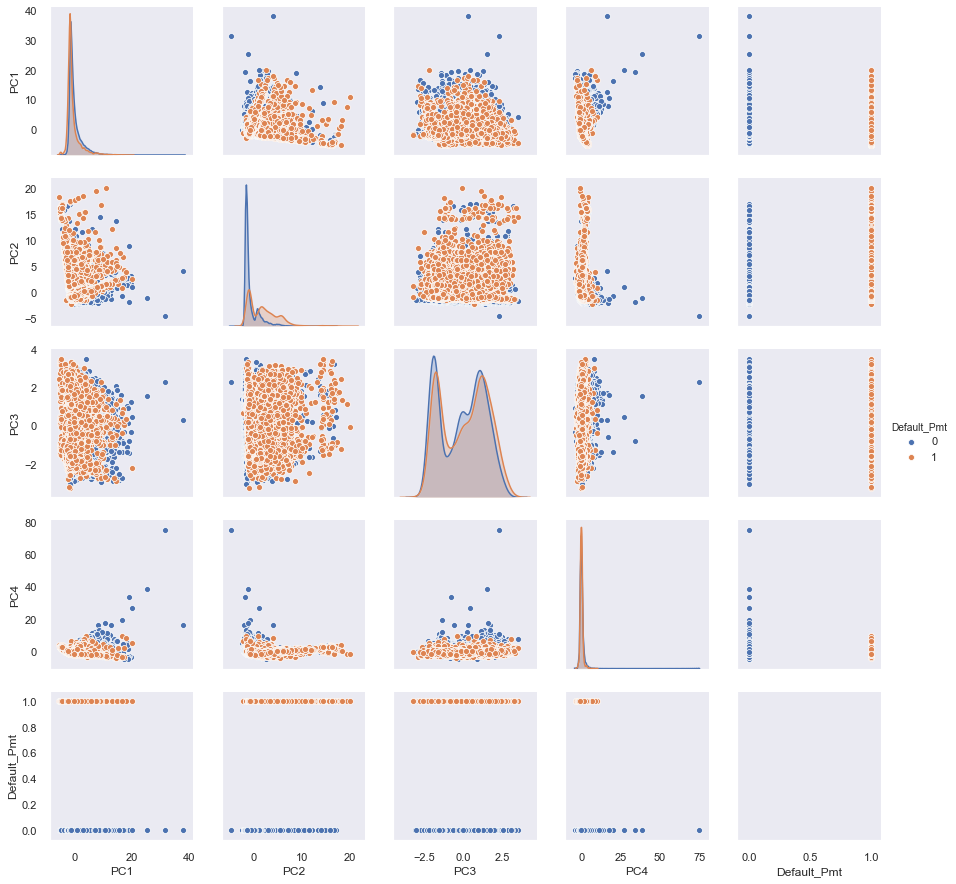

In [193]:
#Pairwise plot of PCs with their default status colored in

sns.pairplot(pc, hue = 'Default_Pmt')
sns.set_style("dark")

PCA pairwise plots above show that the continuous features separate the default status very poorly, indicating that the continuous features such as bill and payment amount and credit limit are likely poor predictors of customers' default status.

In [195]:
#df.head()

In [199]:
y = data_df.Default_Pmt_code.values
data_df.drop(["Default_Pmt_code"], axis=1, inplace=True)#Drop target
X = data_df

## Training and Testing Split
For training and testing purposes, let's gather the data we have and grab 80% of the instances for training and the remaining 20% for testing. Moreover, let's repeat this process of separating the testing and training data three times. We will use the hold out cross validation method built into scikit-learn.

In [200]:
from sklearn.model_selection import train_test_split
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24000, 26) (24000,)
(6000, 26) (6000,)


In [213]:
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
from sklearn.model_selection import ShuffleSplit 
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [215]:
#from sklearn.model_selection import KFoldfrom sklearn.model_selection import KFold # import KFold
#kf = KFold(n_splits=2) # Define the split - into 2 folds 
#kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
#print(kf) 
#KFold(n_splits=2, random_state=None, shuffle=False)

## Logistic Regression
Now let's use Logistic Regression from scikit-learn. The documentation can be found here:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [216]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

KeyError: "None of [Int64Index([23055,  8100,  7874, 24372, 14738, 14148, 13582, 26178,  8671,\n            27162,\n            ...\n             2127,  6227, 29731, 23679,  9404,  4257,  5329, 18131, 19954,\n            26124],\n           dtype='int64', length=24000)] are in the [columns]"

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

predictions = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,predictions)
conf = mt.confusion_matrix(y_test,predictions)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,data_df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.8276666666666667
[[4506  197]
 [ 837  460]]
Sept2005_AmtPaid has weight of -0.22756743162493004
Sept2005_BillAmt has weight of -0.2233039265032366
Risk_Category_code has weight of -0.2103012628643111
Aug2005_AmtPaid has weight of -0.20744739353300606
LIMIT_BAL has weight of -0.13812477523985028
MARRIAGE_code has weight of -0.10387572803193403
April2005_AmtPaid has weight of -0.07528302746707478
EDUCATION_code has weight of -0.07338215587878119
SEX_code has weight of -0.071608928566264
June2005_AmtPaid has weight of -0.05293039015732182
July2005_AmtPaid has weight of -0.04585787527344901
May2005_BillAmt has weight of -0.040704076291738535
Aug2005_Pmt has weight of -0.030973905265001305
May2005_AmtPaid has weight of -0.0141332517641174
April2005_BillAmt has weight of -0.0075047781737253415
June2005_Pmt has weight of 0.014974922431644666
AGE_GROUP_code has weight of 0.015530821000642727
July2005_Pmt has weight of 0.048996963271623666
June2005_BillAmt has weight of 0.0504282752

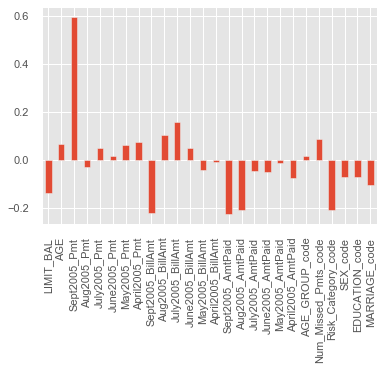

In [238]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=data_df.columns)
weights.plot(kind='bar')
plt.show()

In [236]:
import statsmodels.api as sm
#est = sm.OLS(y, X.astype(float)).fit()
logit_model=sm.Logit(y,X.astype(float))
#logit_model=sm.Logit(y,X.astype(float),num_instances=50)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.443905
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.160     
Dependent Variable:   y                 AIC:               26686.3221
Date:                 2019-10-01 16:12  BIC:               26902.3549
No. Observations:     30000             Log-Likelihood:    -13317.   
Df Model:             25                LL-Null:           -15853.   
Df Residuals:         29974             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
LIMIT_BAL            -0.0000   0.0000  -8.9529 0.0000 -0.0000 -0.0000
AGE             

In [220]:
from sklearn import metrics

In [223]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[4506  197]
 [ 837  460]]


[]

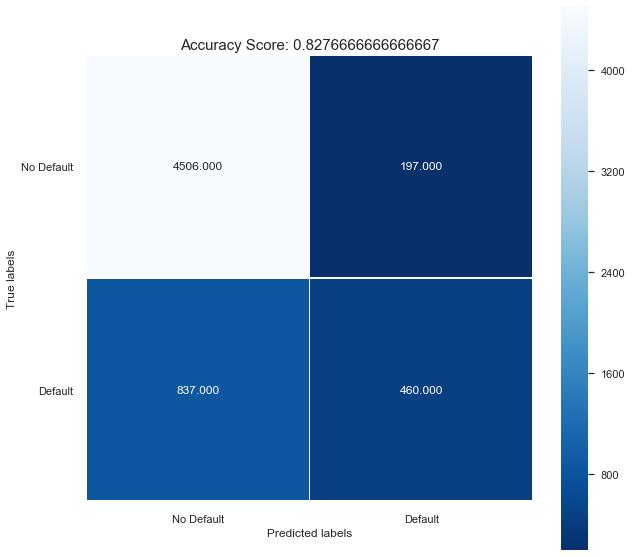

In [229]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
sns.set(rc={'figure.figsize':(10,10)})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15)

ax.set_xticklabels(['No Default','Default'], rotation = 0)
ax.set_yticklabels(['No Default','Default'], rotation = 0)

plt.plot()

### From the Confusion matrix, it looks like the algorithm has a low percentage in predicting the default customers

## ROC Curve for Logistic Regression

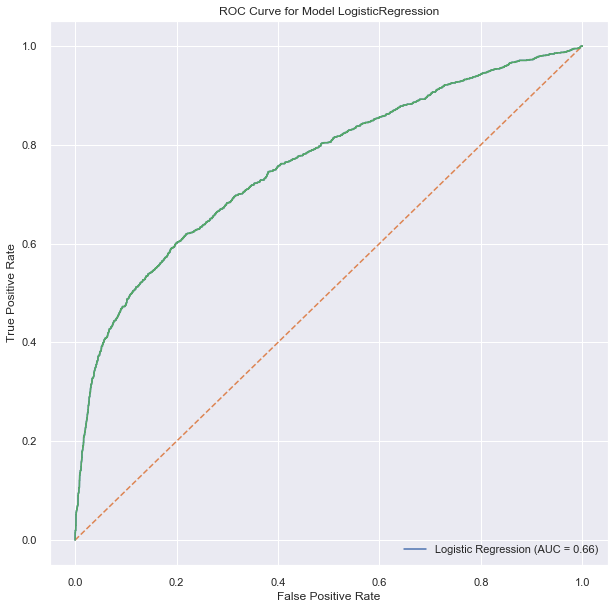

In [235]:
# roc curve
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# fit a model
seed = 7
model = GridSearchCV(
    estimator = LogisticRegression(random_state=seed),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 1, 10, 100, 1000]})#, 
    #cv = kfold, 
    #scoring = scoring, 
    #n_jobs = processors)
model.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure()
pyplot.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve for Model LogisticRegression')
pyplot.legend(loc="lower right")
pyplot.savefig('Log_ROC')
pyplot.show()

## Support Vector Machines

In [244]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

KeyError: "None of [Int64Index([20547, 22178,  4082, 12724, 14478, 25790, 19985, 11075, 15803,\n              906,\n            ...\n            22568, 22306, 21798,  9838, 19285, 16213,  8763, 24587,  7414,\n            25616],\n           dtype='int64', length=24000)] are in the [columns]"

In [245]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.8258333333333333
[[4485  218]
 [ 827  470]]


In [246]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=df_imputed.columns)
weights.plot(kind='bar')

AttributeError: coef_ is only available when using a linear kernel

In [255]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = data_df.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['Default_Pmt_code'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
data_df['Default_Pmt_code'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11005 entries, 20547 to 8763
Data columns (total 28 columns):
LIMIT_BAL               11005 non-null int64
AGE                     11005 non-null int64
Sept2005_Pmt            11005 non-null int64
Aug2005_Pmt             11005 non-null int64
July2005_Pmt            11005 non-null int64
June2005_Pmt            11005 non-null int64
May2005_Pmt             11005 non-null int64
April2005_Pmt           11005 non-null int64
Sept2005_BillAmt        11005 non-null int64
Aug2005_BillAmt         11005 non-null int64
July2005_BillAmt        11005 non-null int64
June2005_BillAmt        11005 non-null int64
May2005_BillAmt         11005 non-null int64
April2005_BillAmt       11005 non-null int64
Sept2005_AmtPaid        11005 non-null int64
Aug2005_AmtPaid         11005 non-null int64
July2005_AmtPaid        11005 non-null int64
June2005_AmtPaid        11005 non-null int64
May2005_AmtPaid         11005 non-null int64
April2005_AmtPaid       11005 non

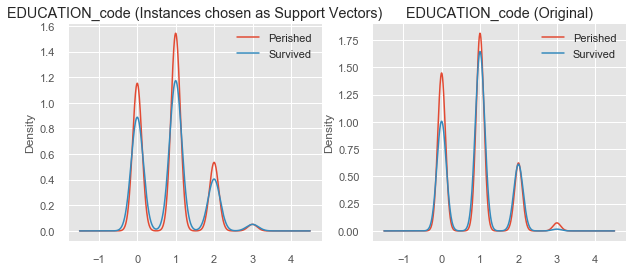

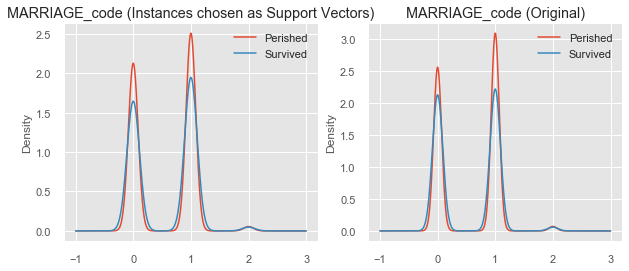

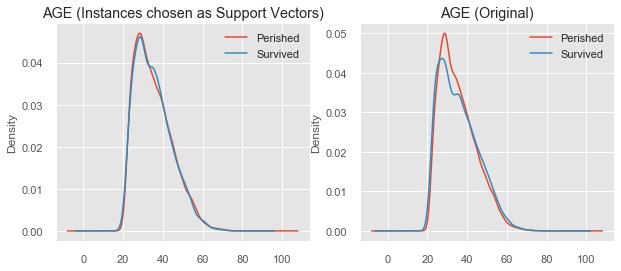

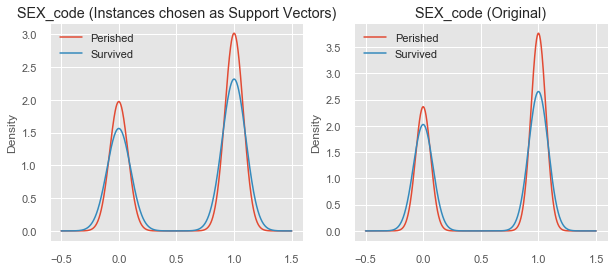

In [256]:
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['Default_Pmt_code'])
df_grouped = data_df.groupby(['Default_Pmt_code'])

# plot KDE of Different variables
vars_to_plot = ['EDUCATION_code','MARRIAGE_code','AGE','SEX_code']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Perished','Survived'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Perished','Survived'])
    plt.title(v+' (Original)')